In [ ]:
!pip install pmlb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmlb import fetch_data
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## loading data

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import random
random.seed(1000)
x_y=fetch_data('fars',return_X_y=0)
x=x_y.iloc[:,0:29]
y=x_y.iloc[:,29]




# Data exploration

Class wise distribution

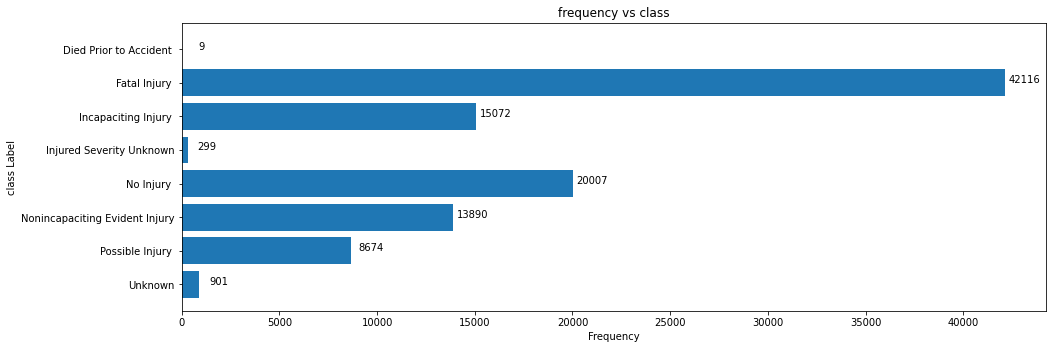

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
labels = ['Died Prior to Accident ','Fatal Injury ','Incapaciting Injury ','Injured Severity Unknown','No Injury ','Nonincapaciting Evident Injury','Possible Injury ','Unknown']
values = [9,42116,15072,299,20007,13890,8674,901]
ax.barh(labels,values)
plt.xlabel("Frequency")
plt.ylabel("class Label")
plt.title("frequency vs class")
ax.invert_yaxis()
for i in range(0,8):
   plt.text(values[i]+1000,i,values[i], ha="center",rotation="horizontal")
plt.show()

missing value chacking

In [ ]:
y.isna().sum()

0

In [ ]:
x.isna().all()

CASE_STATE                             False
AGE                                    False
SEX                                    False
PERSON_TYPE                            False
SEATING_POSITION                       False
RESTRAINT_SYSTEM-USE                   False
AIR_BAG_AVAILABILITY/DEPLOYMENT        False
EJECTION                               False
EJECTION_PATH                          False
EXTRICATION                            False
NON_MOTORIST_LOCATION                  False
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    False
METHOD_ALCOHOL_DETERMINATION           False
ALCOHOL_TEST_TYPE                      False
ALCOHOL_TEST_RESULT                    False
POLICE-REPORTED_DRUG_INVOLVEMENT       False
METHOD_OF_DRUG_DETERMINATION           False
DRUG_TEST_TYPE                         False
DRUG_TEST_RESULTS_(1_of_3)             False
DRUG_TEST_TYPE_(2_of_3)                False
DRUG_TEST_RESULTS_(2_of_3)             False
DRUG_TEST_TYPE_(3_of_3)                False
DRUG_TEST_

No missing data

In [ ]:
x.describe()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
count,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,...,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000
mean,23.425977,37.106707,0.683880,3.155832,5.990700,6.400394,4.979053,0.254407,1.084571,0.914656,...,2.253754,100.089672,2.258102,95.441556,6.098576,1.056018,26.849645,28.935366,19.007507,12.587612
std,15.228212,22.109641,0.498972,2.551538,4.794034,1.900097,3.100175,0.670000,2.843937,0.319389,...,0.942899,295.089512,0.905708,292.121277,1.063206,0.988896,3.256276,2.006201,0.807820,3.110742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,20.000000,0.000000,1.000000,3.000000,5.000000,4.000000,0.000000,0.000000,1.000000,...,2.000000,0.000000,2.000000,0.000000,6.000000,0.000000,27.000000,29.000000,19.000000,11.000000
50%,22.000000,32.000000,1.000000,1.000000,3.000000,7.000000,4.000000,0.000000,0.000000,1.000000,...,2.000000,0.000000,2.000000,0.000000,6.000000,2.000000,27.000000,29.000000,19.000000,11.000000
75%,38.000000,49.000000,1.000000,6.000000,6.000000,7.000000,4.000000,0.000000,0.000000,1.000000,...,2.000000,0.000000,2.000000,0.000000,6.000000,2.000000,27.000000,29.000000,19.000000,15.000000
max,50.000000,99.000000,2.000000,9.000000,25.000000,11.000000,12.000000,3.000000,9.000000,2.000000,...,6.000000,999.000000,6.000000,999.000000,8.000000,2.000000,44.000000,47.000000,32.000000,17.000000


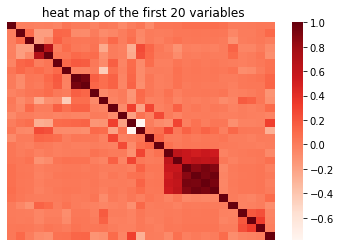

In [ ]:
import seaborn as sns
s=sns.heatmap(x.corr(), cmap = 'Reds')
plt.title(" heat map of the first 20 variables")
plt.axis('off')
plt.show()

#split

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(x,y, test_size=0.2,shuffle=0,random_state=10)

#class imbalance-correction

In [ ]:
train_target.value_counts()

1    33680
4    16064
2    12043
5    11042
6     6963
7      726
3      249
0        7
Name: target, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled_a, y_resampled_a = SMOTE().fit_resample(train_data, train_target)

In [ ]:
pd.DataFrame(y_resampled_a).value_counts()

target
0         33680
1         33680
2         33680
3         33680
4         33680
5         33680
6         33680
7         33680
dtype: int64

In [ ]:
X_resampled_a

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
0,4,46,1,1,3,5,4,0,0,1,...,2,0,2,0,6,2,27,29,19,11
1,43,39,1,1,3,5,4,0,0,1,...,2,0,2,0,6,0,27,29,19,11
2,4,72,0,1,3,5,0,0,0,2,...,2,0,2,0,8,2,27,29,19,15
3,4,14,0,6,6,5,0,0,0,1,...,2,0,2,0,6,2,27,29,19,11
4,4,70,0,6,6,5,4,0,0,1,...,2,0,2,0,6,0,27,29,19,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269435,2,99,2,1,3,11,12,3,9,2,...,2,0,2,0,6,1,27,29,19,11
269436,38,99,2,1,25,11,12,3,9,2,...,5,999,5,999,8,1,27,29,19,15
269437,2,99,2,1,3,11,12,0,0,1,...,2,0,2,0,6,1,27,29,19,11
269438,33,99,2,1,3,11,12,0,0,1,...,2,0,2,0,6,1,27,29,19,11


splitting Data into training and Test

#Normalization


In [ ]:
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(X_resampled_a)
Y=y_resampled_a
x_scaled_data= scaler.fit_transform(test_data)

# FEATURE SELECTION USING DECISION TREE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>10 0.853 (0.005)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>11 0.856 (0.006)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>12 0.857 (0.006)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>13 0.858 (0.006)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>14 0.859 (0.006)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>15 0.859 (0.006)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>16 0.861 (0.004)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>17 0.864 (0.007)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>18 0.867 (0.004)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>19 0.870 (0.007)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>20 0.870 (0.007)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>21 0.870 (0.007)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>22 0.870 (0.006)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


>23 0.870 (0.007)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.4s finished


>24 0.870 (0.006)


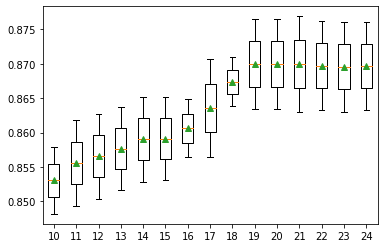

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 #
# get the dataset
def get_dataset():
 X =x_scaled
 y= Y
 return X, y
 
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(10, 25):
  rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
  model = DecisionTreeClassifier()
  models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model_a, X, y):
 cv_a = cross_validate(model_a, X,y, cv=2,verbose=1,return_estimator=True)
 return cv_a['test_score']
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('-%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

Text(0.5, 1.0, 'Number of Features vs accuracy')

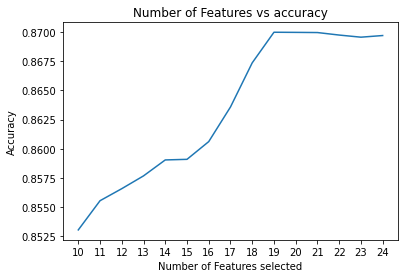

In [ ]:
x=pyplot.plot(names,mean(results,axis=1))
pyplot.xlabel("Number of Features selected")
pyplot.ylabel("Accuracy")
pyplot.title("Number of Features vs accuracy")

Result- Number of featurs are 18 since accuracy is higher and low standard deviation

Finding the selected variables

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# load data
X = x_scaled
Y = Y
# feature extraction
model_d = DecisionTreeClassifier()
rfe_a = RFE(estimator=model_d, n_features_to_select=18)
fit = rfe_a.fit(X, Y)
print("Num Features: %d" % fit.n_features_)


Num Features: 18


In [ ]:
d={"variables": x.columns,"result":fit.support_,"rank":fit.ranking_}
k=pd.DataFrame(d,index=None)
k

,variables,result,rank
0,CASE_STATE,True,1
1,AGE,True,1
2,SEX,True,1
3,PERSON_TYPE,True,1
4,SEATING_POSITION,True,1
5,RESTRAINT_SYSTEM-USE,True,1
6,AIR_BAG_AVAILABILITY/DEPLOYMENT,True,1
7,EJECTION,False,4
8,EJECTION_PATH,True,1
9,EXTRICATION,False,2


##selected variables

In [ ]:
k_selected=k[k["result"]==True]
k_selected

,variables,result,rank
0,CASE_STATE,True,1
1,AGE,True,1
2,SEX,True,1
3,PERSON_TYPE,True,1
4,SEATING_POSITION,True,1
5,RESTRAINT_SYSTEM-USE,True,1
6,AIR_BAG_AVAILABILITY/DEPLOYMENT,True,1
8,EJECTION_PATH,True,1
11,POLICE_REPORTED_ALCOHOL_INVOLVEMENT,True,1
12,METHOD_ALCOHOL_DETERMINATION,True,1


##Ignored variables

In [ ]:
k_not_selected=k[k["result"]==False]
k_not_selected

,variables,result,rank
7,EJECTION,False,4
9,EXTRICATION,False,2
10,NON_MOTORIST_LOCATION,False,7
16,METHOD_OF_DRUG_DETERMINATION,False,6
17,DRUG_TEST_TYPE,False,3
19,DRUG_TEST_TYPE_(2_of_3),False,9
20,DRUG_TEST_RESULTS_(2_of_3),False,8
22,DRUG_TEST_RESULTS_(3_of_3),False,5
23,HISPANIC_ORIGIN,False,10
26,RELATED_FACTOR_(2)-PERSON_LEVEL,False,11


## droping traindata




In [ ]:
x_new=X_resampled_a.drop(k_not_selected["variables"],axis=1)

Feature selection completed

## Normalisiation of selected data

In [ ]:
scaler = MinMaxScaler() 
x_scaled_new = scaler.fit_transform(x_new)

## Test_data preparation

### feature selection

In [ ]:
test_data_new=test_data.drop(k_not_selected["variables"],axis=1)


###  Normalisiation

In [ ]:
scaler = MinMaxScaler() 
x_test_scaled = scaler.fit_transform(test_data_new)


# Decision Tree

## Hyper parameter tuning (GridSearchCV)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
parameters = {'criterion':('gini', 'entropy'), 'max_depth':np.arange(8,12),'splitter': ['best'],'min_impurity_decrease':np.arange(0,0.2,0.05),'min_samples_leaf':(1,2)}
model=DecisionTreeClassifier()
clf_a = GridSearchCV(model, parameters,verbose=3,scoring='accuracy',cv=10)
clf_a.fit(x_scaled_new,Y)
print(clf_a.best_params_) 

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0, splitter=best;, score=0.698 total time=   1.0s
[CV 2/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0, splitter=best;, score=0.700 total time=   0.9s
[CV 3/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0, splitter=best;, score=0.711 total time=   0.9s
[CV 4/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0, splitter=best;, score=0.712 total time=   0.9s
[CV 5/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0, splitter=best;, score=0.712 total time=   0.9s
[CV 6/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0, splitter=best;, score=0.712 total time=   0.9s
[CV 7/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0, splitter=best;, score=0.714 total time=   0.9s
[CV 8/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0, splitter=best;, score=0.713 total time=   0.9s
[

## predictions

In [ ]:
grid_predictions = clf_a.predict(x_test_scaled) 
   
# print classification report 
print(classification_report(test_target, grid_predictions)) 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      8436
           2       0.59      0.37      0.46      3029
           3       0.13      0.58      0.21        50
           4       0.84      0.90      0.87      3943
           5       0.43      0.68      0.53      2848
           6       0.36      0.07      0.12      1711
           7       0.28      0.79      0.41       175

    accuracy                           0.76     20194
   macro avg       0.45      0.55      0.45     20194
weighted avg       0.76      0.76      0.74     20194



F1 score (weighted)=0.75

## conclusion

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate
model=DecisionTreeClassifier(criterion='entropy',max_depth=12,min_impurity_decrease=0.0,splitter='best',min_samples_leaf=2)
cv_results_a = cross_validate(model, x_scaled_new,Y, cv=10,verbose=1,return_estimator=True)
accuracies_a = cv_results_a['test_score']
accuracies_a=list(accuracies_a)
models=cv_results_a['estimator']
model = models[accuracies_a.index(max(accuracies_a))]
predictions = model.predict(x_test_scaled) 
   
# print classification report 
print(classification_report(test_target, predictions)) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      8436
           2       0.49      0.68      0.57      3029
           3       0.13      0.48      0.21        50
           4       0.85      0.91      0.88      3943
           5       0.44      0.36      0.40      2848
           6       0.35      0.11      0.17      1711
           7       0.40      0.77      0.52       175

    accuracy                           0.76     20194
   macro avg       0.46      0.54      0.47     20194
weighted avg       0.75      0.76      0.75     20194



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.7s finished


In [ ]:
# saving the model
import pickle
filename = '/content/gdrive/MyDrive/Ml_project/fars_models/decision_tree.sav'
pickle.dump(model, open(filename, 'wb'))

## Tree image

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
plt.figure(figsize=(30,30))
tree.plot_tree(model, filled=0, fontsize=8,max_depth=5)

## Accuracy =0.75



#Random Forest

## Hyper parameter tuning (GridSearch CV)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
parameters = {'criterion':('gini', 'entropy'), 'max_depth':np.arange(8,12),'min_impurity_decrease':np.arange(0,0.2,0.05)}
model=RandomForestClassifier()
clf_a = GridSearchCV(model, parameters,verbose=3,scoring='accuracy',cv=10)
clf_a.fit(x_scaled_new,Y)
print(clf_a.best_params_) 

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.711 total time=  20.8s
[CV 2/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.709 total time=  20.2s
[CV 3/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.724 total time=  20.1s
[CV 4/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.728 total time=  17.8s
[CV 5/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.728 total time=  16.9s
[CV 6/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.724 total time=  17.5s
[CV 7/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.726 total time=  18.6s
[CV 8/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.728 total time=  23.2s
[CV 9/10] END criterion=gini, max_depth=8, min_impurity_decrease=0.0;, score=0.729 total time=  20.9s
[CV 10/10] END crit

## conclusion

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate
model=RandomForestClassifier(criterion='entropy',max_depth=11,min_impurity_decrease=0.0)
cv_results = cross_validate(model, x_scaled_new,Y, cv=10,verbose=1,return_estimator=True)
accuracies = cv_results['test_score']
accuracies=list(accuracies)
models=cv_results['estimator']
model = models[accuracies.index(max(accuracies))]
predictions = model.predict(x_test_scaled) 
   
# print classification report 
print(classification_report(test_target, predictions)) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.1min finished


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      8436
           2       0.53      0.71      0.60      3029
           3       0.10      0.56      0.17        50
           4       0.84      0.95      0.89      3943
           5       0.47      0.40      0.43      2848
           6       0.52      0.05      0.08      1711
           7       0.52      0.83      0.64       175

    accuracy                           0.78     20194
   macro avg       0.50      0.56      0.48     20194
weighted avg       0.78      0.78      0.76     20194



In [ ]:
# saving the model
import pickle
filename = '/content/gdrive/MyDrive/Ml_project/fars_models/random_forest_tree.sav'
pickle.dump(model, open(filename, 'wb'))

## Accuracy=0.76

#SVM (SVC)

## Hyper parameter tuning (Bayesion optimization)

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Assumption using only 5000 data since tuning takes more than 10 hrs and colabs crashes 
from skopt.space import Real,Categorical,Integer
from sklearn.metrics import classification_report, confusion_matrix 
from skopt import BayesSearchCV
from sklearn.svm import SVC
parameters = {'C':Real(0.1,2),'kernel':['poly'],'gamma':Real(0.5,2),'degree':(3,4,5)}
model=SVC()
clf_a = BayesSearchCV(model, search_spaces=parameters,verbose=3,scoring='accuracy',cv=2,random_state=0,n_iter=20,optimizer_kwargs={'base_estimator': 'GP'})
clf_a.fit(x_scaled_new[:5000],Y[:5000])
print(clf_a.best_params_) 


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END C=1.10883191340908, degree=4, gamma=1.4340646289441554, kernel=poly;, score=0.725 total time=   2.3s
[CV 2/2] END C=1.10883191340908, degree=4, gamma=1.4340646289441554, kernel=poly;, score=0.726 total time=   1.7s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END C=0.5909061577482214, degree=5, gamma=1.8626575605049618, kernel=poly;, score=0.716 total time=  18.8s
[CV 2/2] END C=0.5909061577482214, degree=5, gamma=1.8626575605049618, kernel=poly;, score=0.713 total time=  16.4s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END C=1.1045143099433568, degree=3, gamma=1.0134251737470477, kernel=poly;, score=0.750 total time=   0.7s
[CV 2/2] END C=1.1045143099433568, degree=3, gamma=1.0134251737470477, kernel=poly;, score=0.759 total time=   0.7s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END C=0.38009764270722635, degree=5, gamma=1.2049160605443756, 

## conclusion

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate
model=SVC(C=2,gamma=0.75,kernel='poly',degree=3)
cv_results = cross_validate(model, x_scaled_new[:50000],Y[:50000], cv=5,verbose=1,return_estimator=True)
accuracies = cv_results['test_score']
accuracies=list(accuracies)
models=cv_results['estimator']
model = models[accuracies.index(max(accuracies))]
predictions = model.predict(x_test_scaled) 
   
# print classification report 
print(classification_report(test_target, predictions)) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.2min finished


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.99      1.00      8436
           2       0.52      0.58      0.55      3029
           3       0.42      0.22      0.29        50
           4       0.84      0.99      0.90      3943
           5       0.44      0.54      0.49      2848
           6       0.53      0.04      0.08      1711
           7       0.70      0.67      0.69       175

    accuracy                           0.78     20194
   macro avg       0.56      0.50      0.50     20194
weighted avg       0.77      0.78      0.76     20194



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Accuracy - 0.78

In [ ]:
# save the model to disk since retraining is expensive
import pickle
filename = '/content/gdrive/MyDrive/Ml_project/fars_models/SVC.sav'
pickle.dump(model, open(filename, 'wb'))

# K- nearest neighbour

## Hyper parameter tuning (GridSearch CV)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
parameters = {'n_neighbors':np.arange(3,5),'metric':['manhattan']}
model=KNeighborsClassifier()
clf_a = GridSearchCV(model, parameters,verbose=3,scoring='accuracy',cv=5)
clf_a.fit(x_scaled_new,Y)
print(clf_a.best_params_) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...metric=manhattan, n_neighbors=3;, score=0.792 total time= 5.9min
[CV 2/5] END ...metric=manhattan, n_neighbors=3;, score=0.839 total time= 5.8min
[CV 3/5] END ...metric=manhattan, n_neighbors=3;, score=0.865 total time= 5.7min
[CV 4/5] END ...metric=manhattan, n_neighbors=3;, score=0.870 total time= 5.7min
[CV 5/5] END ...metric=manhattan, n_neighbors=3;, score=0.869 total time= 5.7min
[CV 1/5] END ...metric=manhattan, n_neighbors=4;, score=0.824 total time= 6.7min
[CV 2/5] END ...metric=manhattan, n_neighbors=4;, score=0.849 total time= 7.2min
[CV 3/5] END ...metric=manhattan, n_neighbors=4;, score=0.871 total time= 6.8min
[CV 4/5] END ...metric=manhattan, n_neighbors=4;, score=0.877 total time= 7.0min
[CV 5/5] END ...metric=manhattan, n_neighbors=4;, score=0.873 total time= 6.9min
{'metric': 'manhattan', 'n_neighbors': 4}


## conclusion

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate
model=KNeighborsClassifier(n_neighbors=4,metric='manhattan')
cv_results = cross_validate(model, x_scaled_new,Y, cv=5,verbose=1,return_estimator=True)
accuracies = cv_results['test_score']
accuracies=list(accuracies)
models=cv_results['estimator']
model = models[accuracies.index(max(accuracies))]
predictions = model.predict(x_test_scaled) 
   
# print classification report 
print(classification_report(test_target, model.predict(x_test_scaled))) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 28.7min finished


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      0.95      0.97      8436
           2       0.49      0.58      0.53      3029
           3       0.17      0.48      0.25        50
           4       0.84      0.87      0.85      3943
           5       0.43      0.38      0.40      2848
           6       0.27      0.23      0.25      1711
           7       0.46      0.71      0.56       175

    accuracy                           0.73     20194
   macro avg       0.46      0.52      0.48     20194
weighted avg       0.74      0.73      0.73     20194



In [ ]:
# save the model to disk since retraining is expensive
import pickle
filename = '/content/gdrive/MyDrive/Ml_project/fars_models/knn.sav'
pickle.dump(model, open(filename, 'wb'))

# Ensembled method stacking

In [ ]:
import pickle
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate
knn= pickle.load(open('/content/gdrive/MyDrive/Ml_project/fars_models/knn.sav', 'rb'))
svc= pickle.load(open('/content/gdrive/MyDrive/Ml_project/fars_models/SVC.sav', 'rb'))
random_forest= pickle.load(open('/content/gdrive/MyDrive/Ml_project/fars_models/random_forest_tree.sav', 'rb'))
decision_trr= pickle.load(open('/content/gdrive/MyDrive/Ml_project/fars_models/decision_tree.sav', 'rb'))

models = [('knn',knn),('svc',svc),('random_forest',random_forest),('decision_trr',decision_trr)] 

stacking_model = LogisticRegression(solver='sag',random_state=0,max_iter=200)
stacked_model = StackingClassifier( estimators = models,final_estimator = stacking_model)
results_cv = cross_validate(stacked_model, x_scaled_new[:20000],Y[:20000], cv=5,verbose=1,return_estimator=True)

# Cv plot for the ensemble model

In [ ]:
results_cv['test_score'][:3]

array([0.77975, 0.78825, 0.79125])

Text(0, 0.5, 'Accuracy')

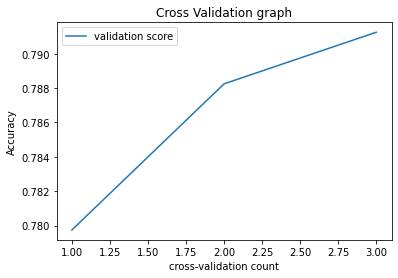

In [ ]:
d={'t':[1,2,3],'validation score':results_cv['test_score'][:3]}
pd.DataFrame(d).plot.line('t','validation score')
plt.title("Cross Validation graph")
plt.xlabel("cross-validation count")
plt.ylabel("Accuracy")


In [ ]:
accuracies = results_cv['test_score']
accuracies=list(accuracies)
models=results_cv['estimator']
model = models[accuracies.index(max(accuracies))]
predictions = model.predict(x_test_scaled) 
   
# print classification report 
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      8436
           2       0.59      0.61      0.60      3029
           3       0.92      0.22      0.35        50
           4       0.84      0.99      0.91      3943
           5       0.46      0.59      0.51      2848
           6       0.52      0.06      0.10      1711
           7       0.71      0.67      0.69       175

    accuracy                           0.79     20194
   macro avg       0.63      0.52      0.52     20194
weighted avg       0.79      0.79      0.77     20194



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#appendix

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf=LazyClassifier(verbose=1,ignore_warnings=True,custom_metric=None)
models,prediction=clf.fit(x_scaled_new[:10000],x_test_scaled[:10000],Y[:10000],test_target[:10000])
print(models)